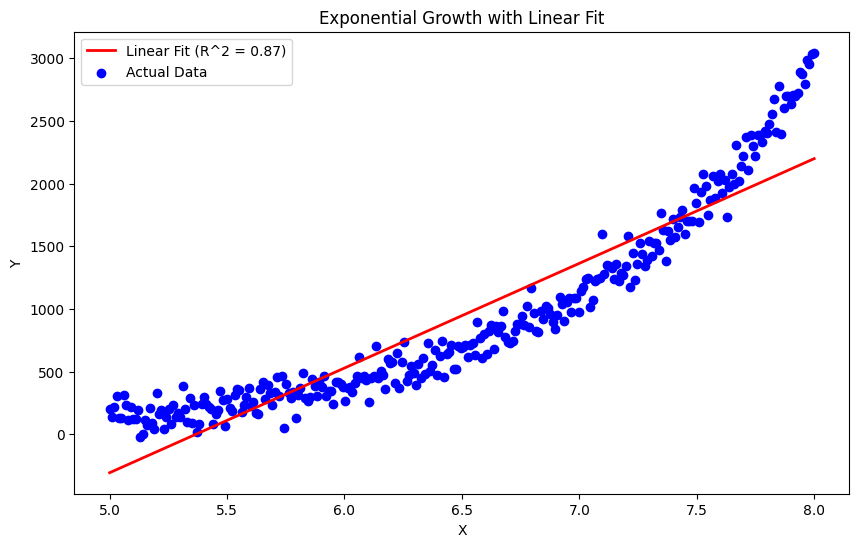

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
x = np.linspace(5,8,300)
y = np.exp(x) + np.random.normal(scale=100, size=x.size)
x_reshaped = x.reshape(-1,1)

model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

r2_score = r2_score(y, y_pred)

plt.figure(figsize=(10,6))
plt.plot(x,y_pred, label=f"Linear Fit (R^2 = {r2_score:.2f})", color='red', linewidth=2)
plt.scatter(x,y,label='Actual Data', color='blue')
plt.title('Exponential Growth with Linear Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

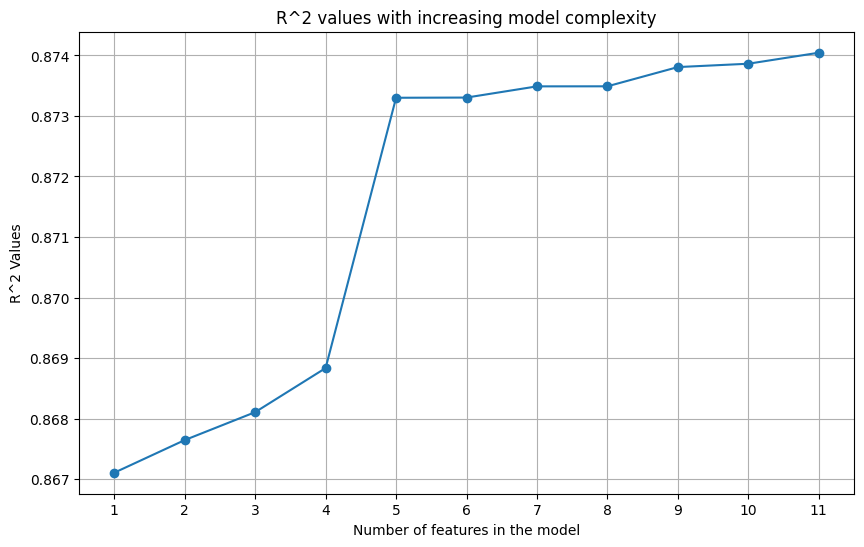

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
x = np.linspace(5,8,300)
y = np.exp(x) + np.random.normal(scale=100, size=x.size)
x_reshaped = x.reshape(-1,1)

n_irrelevant = 10
X_irrelevant = np.random.normal(size=(x.size, n_irrelevant))


r2_values = []
num_features = []

model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)
r2_values.append(r2_score(y, y_pred))
num_features.append(1)

for i in range(1, n_irrelevant + 1):
    X_combined = np.hstack((x_reshaped, X_irrelevant[:,:i]))
    model = LinearRegression()
    model.fit(X_combined, y)
    r2_values.append(r2_score(y, model.predict(X_combined)))
    num_features.append(i+1)


plt.figure(figsize=(10,6))
plt.plot(num_features, r2_values, marker='o')
plt.title('R^2 values with increasing model complexity')
plt.xlabel('Number of features in the model')
plt.ylabel('R^2 Values')
plt.xticks(num_features)
plt.grid(True)
plt.show()

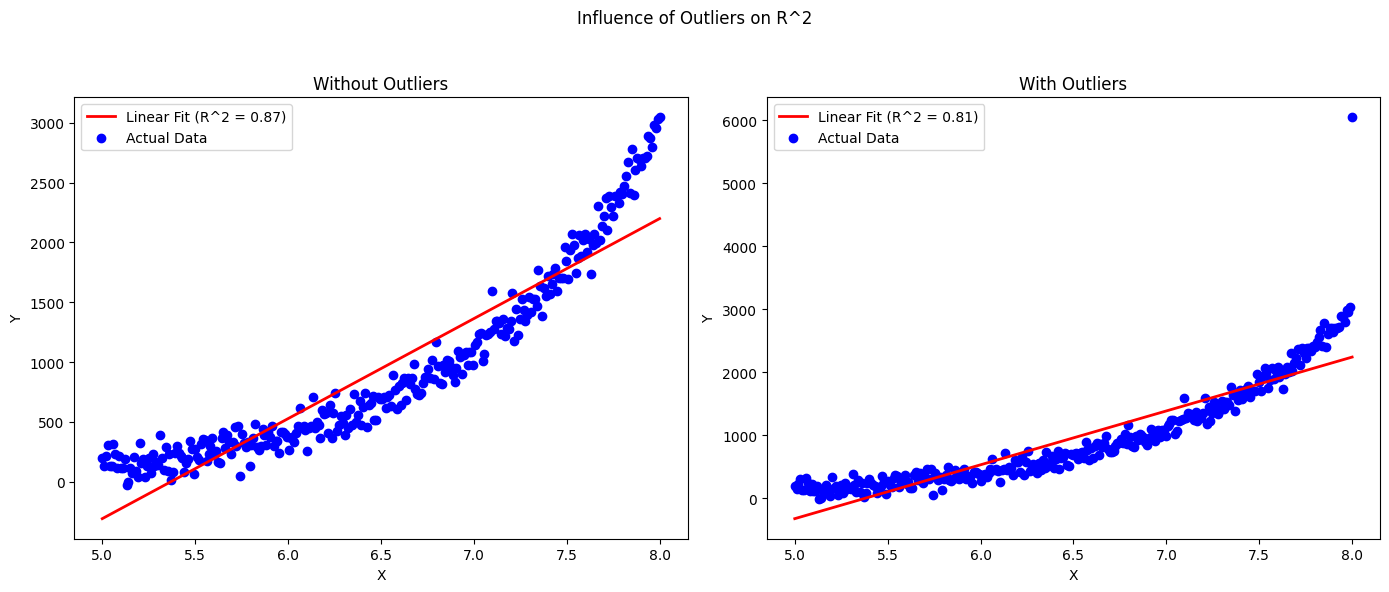

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(5, 8, 300)
y = np.exp(x) + np.random.normal(scale=100, size=x.size)
x_reshaped = x.reshape(-1,1)

# Fit the model
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Calculate R^2 score
r2_without_outliers = r2_score(y, y_pred)

# Add an outlier
y_with_outlier = y.copy()
y_with_outlier[-1] += 5000  # Add a large outlier
model.fit(x_reshaped, y_with_outlier)
y_pred_with_outlier = model.predict(x_reshaped)

# Calculate R^2 score with outlier
r2_with_outliers = r2_score(y_with_outlier, y_pred_with_outlier)

# Plotting
plt.figure(figsize=(14, 6))

# Plot without outliers
plt.subplot(1, 2, 1)
plt.plot(x, y_pred, label=f"Linear Fit (R^2 = {r2_without_outliers:.2f})", color='red', linewidth=2)
plt.scatter(x, y, label='Actual Data', color='blue')
plt.title('Without Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot with outliers
plt.subplot(1, 2, 2)
plt.plot(x, y_pred_with_outlier, label=f"Linear Fit (R^2 = {r2_with_outliers:.2f})", color='red', linewidth=2)
plt.scatter(x, y_with_outlier, label='Actual Data', color='blue')
plt.title('With Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.suptitle('Influence of Outliers on R^2')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
